# Анализ программы лояльности 

Цель работы - проанализировать программу лояльности в магазине «Строили, строили и наконец построили». В данном анализе подготовим данные для дальнейшего анализа, затем изучим их, после проверим гипотезу: средний чек участников программы лояльности выше, чем у остальных покупателей.

1. [Загрузка данных и ознакомление с ними](#start)
2. [Предобработка данных](#preprocessing)
    * [Изменение названий столбцов](#names)
    * [Изменение типов данных ](#type) 
    * [Проверка данных на наличие дубликатов](#duplicates)
    * [Анализ пропущенных значений](#null)
    * [Создание новых столбцов](#new)
    * [Объединение таблиц ](#table)
    * [Анализ аномальных значений ](#anomal)
    
3. [Изучение и анализ данных.](#analiz)
    * [Изучение временного периода ](#time)
    * [Изучение магазинов ](#shop)
    * [Анализ среднего чека ](#chek)
    * [Анализ среднего количества товаров в чеке по магазинам](#quant)
    * [Расчет доли пользователей с картой лояльности](#share)
    * [Расчет пользовательской активности за месяц](#mau)
    * [Анализ LTV по зарегистрированным пользователям](#ltv)
    
4. [Проверка гипотез](#gip)
    * [Гипотеза 1: средний чек участников программы лояльности выше, чем у остальных покупателей.](#gip1)
    * [Гипотеза 2: среднее количество товаров в чеке у участников программы лояльности выше](#gip2)
    
5. [Вывод](#all)
5. [Презентация](#present)
5. [Дашборд](#dashbord)

## 1 Загрузка данных и ознакомление с ними 
<a id="start"></a> 

In [83]:
#импорт нужных библиотек для дальнейшей работы 
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
from scipy import stats as st

In [84]:
#создаем переменную и открываем в ней таблицу с данными 
product= pd.read_csv('product_codes.csv')
product.head(5)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [85]:
#создаем переменную и открываем в ней таблицу с данными 
retail=pd.read_csv('retail_dataset.csv')
retail.head(5)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [86]:
#вывод общей информации о данных
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [87]:
#вывод общей информации о данных
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [88]:
#подсчет количества данных до обработки 
shape=retail.shape[0]
shape

105335

Мы ознакомились с полученными данными. В таблице product типы данных указаны правильно, но в дальнейшей работе изменим в ней названия столбцов на змеинный регистр и проверим данные на наличие дубликатов.
В таблице retail изменить названия столбцов на змеинный регистр, поменяем тип данных в нужных столбцах, изучим пропуски в столбце CustomerID и проверим данные на наличие дубликатов.

## 2 Предобработка данных 
<a id="preprocessing"></a> 

### 2.1 Изменение названий столбцов
<a id="names"></a> 

In [89]:
#изменение названия столбца на змеиный регистр 
product= product.rename(columns={'productID':'product_id'})
product.head()

,product_id,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [90]:
#изменение названий столбцов на змеиный регистр 
retail.columns=['purchase_id','item_id','quantity','purchase_date','customer_id','shop_id','loyalty_program']
retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


### 2.2 Изменение типов данных 
<a id="type"></a> 

Нужно будет заменить тип данных в purchase_date на дату (datetime), в столбце customer_id на //////// и в loyalty_program указано только целые числа, поэтому заменим тип данных на int.

In [91]:
#изменение типов данных
retail['purchase_date']=pd.to_datetime(retail['purchase_date'], format='%Y-%m-%dT%H:%M:%S')
retail['customer_id']=retail['customer_id'].astype('object')
retail['loyalty_program']=retail['loyalty_program'].astype('int64')
retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1


In [92]:
#проверка изменения типов данных.
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   object        
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.6+ MB


### 2.3 Проверка данных на наличие дубликатов
<a id="duplicates"></a> 

In [93]:
#проверка на наличие явных дубликатов
product.duplicated().sum()

0

In [94]:
#проверка на наличие явных дубликатов
retail.duplicated().sum()

1033

В таблице retail было выявлено 1 033 явных дубликатов, их можно удалить, так как такие данные занимают 1% от всех данных.

In [95]:
#удаление янвых дубликатов 
retail=retail.drop_duplicates().reset_index(drop=True)
retail.head(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1


In [96]:
#проверка удаления явных дубликатов
retail.duplicated().sum()

0

In [97]:
#проверка наличия неявных дубликатов
retail['shop_id'].unique()

array(['Shop 0', 'Shop 1', 'Shop 4', 'Shop 6', 'Shop 2', 'Shop 11',
       'Shop 3', 'Shop 5', 'Shop 7', 'Shop 12', 'Shop 8', 'Shop 27',
       'Shop 10', 'Shop 20', 'Shop 19', 'Shop 25', 'Shop 14', 'Shop 21',
       'Shop 18', 'Shop 9', 'Shop 16', 'Shop 28', 'Shop 29', 'Shop 17',
       'Shop 22', 'Shop 13', 'Shop 26', 'Shop 24', 'Shop 15', 'Shop 23',
       'Shop 30'], dtype=object)

Неявных дубликатов в данных нет, да есть повторения некоторых значений в разных столбцах, но это нормально. 

### 2.4 Анализ пропущенных значений
<a id="null"></a> 

In [98]:
#вывод пропущенных значений по столбцам
retail.isna().sum()

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36148
shop_id                0
loyalty_program        0
dtype: int64

In [99]:
#делаем срез данных по пропущенным значениям
nan_customer= retail.loc[retail['customer_id'].isna()]
nan_customer.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0
16,539744,22300,5,2016-12-21 15:21:00,NaN,Shop 0,0


In [100]:
#вывод уникальных значений системы лояльности 
nan_customer['loyalty_program'].unique()

array([0], dtype=int64)

В итоге все клиенты с пропущенным значением в customer_id не состоят в программе лояльности. Получается это обычные клиенты, которые, возможно, впервые попали в наш магазин и что-то приобрели, поэтому их нет в базе данных. Таких пропусков много, их мы оставляем, потому что такие клиенты нам тоже важны.

### 2.5 Создание новых столбцов
<a id="new"></a> 

In [101]:
#создание отдельного столбца с датой
retail['date']=retail['purchase_date'].dt.date
retail.head(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13


In [102]:
#создание отдельного столбца с месяцем
retail['month']=retail['date'].astype('datetime64[M]')
retail.head(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01


### 2.6 Объединение таблиц 
<a id="tabl"></a> 

In [103]:
#создание сводной таблицы с расчетом медианы цены по одному товару 
price=product.pivot_table(index='product_id', values='price_per_one', aggfunc='median').reset_index()
price.head(10)

,product_id,price_per_one
0,10002,1.630
1,10080,0.850
2,10120,0.210
3,10123C,0.650
4,10124A,0.420
5,10124G,0.420
6,10125,0.810
7,10133,0.830
8,10135,1.265
9,11001,3.290


In [104]:
#объединение таблиц по id товара
retail_new=retail.merge(price, left_on='item_id',right_on='product_id',how='left')
retail_new.head(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,product_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,21873,1.630
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,22195,3.290
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,21239,1.630
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,22271,4.370
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,79321,5.750
5,538379,22965,0,2016-12-12 11:26:00,22805.0,Shop 0,1,2016-12-12,2016-12-01,22965,3.115
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0,2017-01-07,2017-01-01,22189,3.950
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0,2017-01-17,2017-01-01,79321,5.750
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0,2016-12-14,2016-12-01,22891,6.270
9,539501,22372,0,2016-12-20 11:08:00,22764.0,Shop 0,1,2016-12-20,2016-12-01,22372,4.230


In [105]:
#удаление ненужного столбца 
retail_new=retail_new.drop(columns='product_id')
retail_new.head(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.63
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.29
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.63
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.37
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.75


### 2.7 Анализ аномальных значений 
<a id="anomal"></a> 

In [106]:
#числовое описание данных
retail_new['quantity'].describe()

count    104302.000000
mean          7.883003
std         329.565540
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64

В данных есть отрицательное количество проданных товаров, изучим их.

In [107]:
#делаем срез для вывода информации о товарах с отрицательным значением
quant = retail_new.query('0>quantity')
print('Количество уникальных значений id товаров:', quant['item_id'].nunique())
print('Количество магазинов, в которых есть отрицательное количество товаров:',quant['shop_id'].nunique())
quant.head()

Количество уникальных значений id товаров: 950
Количество магазинов, в которых есть отрицательное количество товаров: 18


,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
64,C539944,22776,-2,2016-12-23 11:38:00,20239.0,Shop 0,0,2016-12-23,2016-12-01,14.955
109,C542910,20726,-2,2017-02-01 15:38:00,23190.0,Shop 0,1,2017-02-01,2017-02-01,4.130
112,C542426,22418,-25,2017-01-28 09:32:00,19825.0,Shop 0,0,2017-01-28,2017-01-01,1.645
253,C539726,22791,-11,2016-12-21 14:24:00,22686.0,Shop 0,1,2016-12-21,2016-12-01,1.855
344,C544034,21878,-2,2017-02-15 11:28:00,20380.0,Shop 0,0,2017-02-15,2017-02-01,1.240


В данных есть отрицательные значения в количестве проданного товара, такое невозможно, потому что даже при возврате в чеке пишется положительное число и добалвятся строка "Возврат прихода", скорее всего в кассовой системе произошел какой-то сбой и появились такие значения. Поэтому исправим их на положительное значение.

In [108]:
#все отрицательные значения изменяем на положительные
retail_new['quantity']=abs(retail_new['quantity'])

Теперь посмотрим какие аномальные значения есть в данном столбце 

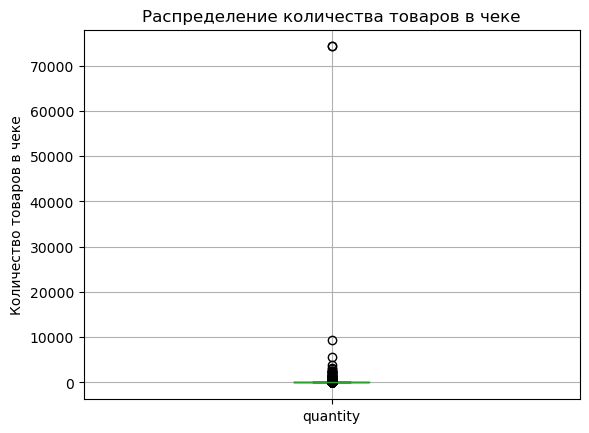

In [109]:
#анализ аномальных значений по количеству товаров в чеке
retail_new.boxplot(column='quantity')
plt.ylabel('Количество товаров в чеке')
plt.title('Распределение количества товаров в чеке')
plt.show()

По этой таблице мы видим, что есть точечные выбросы, начиная с 8 000 товаров. Поэтому сделаем срез данных и уберем такие значения из данных.

In [110]:
#делаем срез данных 
retail_new= retail_new.query('quantity < 8000').reset_index(drop=True)
retail_new.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.63
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.29
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.63
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.37
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.75


Теперь еще раз построим ящик с усами и посмотрим есть ли еще точечные аномалии в данных.

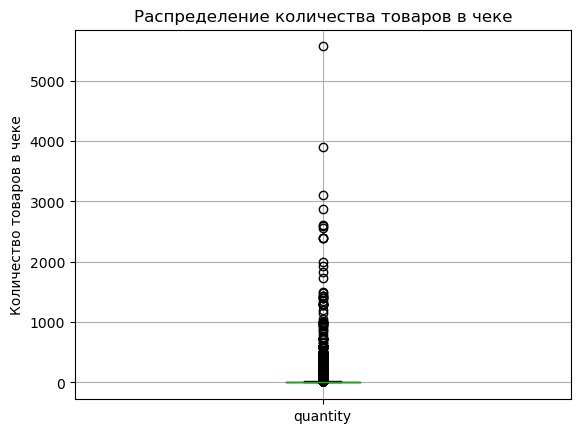

In [111]:
#анализ аномальных значений по количеству товаров в чеке
retail_new.boxplot(column='quantity')
plt.ylabel('Количество товаров в чеке')
plt.title('Распределение количества товаров в чеке')
plt.show()

Да, по ящику с усами видим,что остались точечные аномалии после 1500 единиц товара, поэтому уберем их из данных.

In [112]:
#делаем срез данных 
retail_new= retail_new.query('quantity < 1500').reset_index(drop=True)
retail_new.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.63
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.29
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.63
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.37
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.75


В столбце quantity мы удалили точечные аномалии. Теперь проверим есть ли аномальные значения в цене товара.

In [113]:
#числовое описание данных
retail_new['price_per_one'].describe()

count    104285.000000
mean          5.300134
std          69.554875
min           0.000000
25%           1.650000
50%           3.040000
75%           5.205000
max        6706.710000
Name: price_per_one, dtype: float64

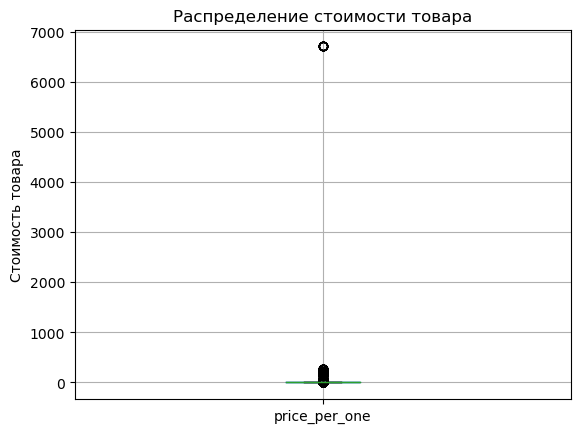

In [114]:
#построение ящика с усами по стоимости товара
retail_new.boxplot(column='price_per_one')
plt.ylabel('Стоимость товара')
plt.title('Распределение стоимости товара')
plt.show()

Вы видим, что есть один выброс по цене, уберем его из данных. А потом проверим товары, которые стоят 0 рублей.

In [115]:
#делаем срез данных
retail_new= retail_new.query('price_per_one < 1000').reset_index(drop=True)
retail_new

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.630
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.290
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.630
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.370
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.750
...,...,...,...,...,...,...,...,...,...,...
104269,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2016-12-01,2.460
104270,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0,2017-01-05,2017-01-01,9.335
104271,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,2016-12-01,8.330
104272,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,0.830


In [116]:
#вывод таблицы с нулевым значением стоиомости
price_0=retail_new.query('price_per_one ==0').reset_index(drop=True)
price_0

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538142,84247C,0,2016-12-09 15:58:00,NaN,Shop 0,0,2016-12-09,2016-12-01,0.0
1,543258,84611B,1286,2017-02-04 16:06:00,NaN,Shop 0,0,2017-02-04,2017-02-01,0.0
2,542570,85028S,2,2017-01-28 14:53:00,NaN,Shop 0,0,2017-01-28,2017-01-01,0.0
3,542581,90091,2,2017-01-28 14:58:00,NaN,Shop 0,0,2017-01-28,2017-01-01,0.0
4,540987,17011A,62,2017-01-12 16:15:00,NaN,Shop 0,0,2017-01-12,2017-01-01,0.0
5,543257,84611B,1431,2017-02-04 16:06:00,NaN,Shop 0,0,2017-02-04,2017-02-01,0.0
6,542576,85179B,2,2017-01-28 14:56:00,NaN,Shop 0,0,2017-01-28,2017-01-01,0.0
7,542414,84967A,3,2017-01-27 17:15:00,NaN,Shop 0,0,2017-01-27,2017-01-01,0.0
8,536549,85226A,0,2016-12-01 14:34:00,NaN,Shop 0,0,2016-12-01,2016-12-01,0.0
9,542418,84966A,18,2017-01-27 17:39:00,NaN,Shop 0,0,2017-01-27,2017-01-01,0.0


In [117]:
#расчет количества уникальных товаров
price_0['item_id'].nunique()

57

In [118]:
#расчет количества уникальных чеков
price_0['purchase_id'].nunique()

59

Изучив таблицу со стоимостью товаров в 0 рублей, можно сказать ,что такие товары есть только в магазине Shop 0 у клиентов без карты лояльности. А так же так стоит 57 товаров в 59 чеках. Такие данные можно убрать, так как их немного и они никак не повлияют на дальнейший анализ данных.

In [119]:
#делаем срез данных
retail_new= retail_new.query('price_per_one >0').reset_index(drop=True)
retail_new

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.630
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.290
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.630
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.370
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.750
...,...,...,...,...,...,...,...,...,...,...
104210,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2016-12-01,2.460
104211,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0,2017-01-05,2017-01-01,9.335
104212,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,2016-12-01,8.330
104213,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,0.830


In [120]:
#расчет сколько данных по потеряли после предобработки данных
print('В предобработке убрано данных(в %):',100-(retail_new.shape[0]*100/ shape))

В предобработке убрано данных(в %): 1.063274315279827


В данном разделе мы изменили названия столбцов на змеиный регистр, поменяли тип данных, где это было нужно, удалили явные дубликаты, создали новые столбцы, объединили таблицы и убрали выбросы. Всего вы убрали 1.06% данных во время предобработки. Теперь данные готовы к дальнейшему анализу. 

## 3 Изучение и анализ данных
<a id="analiz"></a> 

### 3.1 Изучение временного периода 
<a id="time"></a> 

In [121]:
#определение минимальной даты 
min_date=retail_new['date'].min()
min_date

datetime.date(2016, 12, 1)

In [122]:
#определение максимальной даты 
max_date=retail_new['date'].max()
max_date

datetime.date(2017, 2, 28)

Мы имеем данные за период с 1 декабря 2016 года по 28 февраля 2017 года. 

### 3.2 Изучение магазинов 
<a id="shop"></a> 

Теперь изучим магазины по месяцам.

In [123]:
#построение сводной таблицы с расчетом количества чеков по магазинам в каждом месяце
shop_month = retail_new.pivot_table(index='shop_id',columns='month',values='purchase_id', aggfunc='nunique')
shop_month

month,2016-12-01,2017-01-01,2017-02-01
shop_id,,,
Shop 0,1858.0,1285.0,1246.0
Shop 1,24.0,39.0,27.0
Shop 10,8.0,5.0,2.0
Shop 11,3.0,5.0,2.0
Shop 12,5.0,6.0,10.0
Shop 13,4.0,NaN,NaN
Shop 14,3.0,1.0,2.0
Shop 15,1.0,1.0,NaN
Shop 16,1.0,2.0,1.0


По этой таблице мы видим, что у нас есть данные о продажах не во всех магазинах, что может быть связано с тем, что какие-то магазина только открылись , например магазин 28,29 и 30 или же некоторые магазины закрылись, например магазины 13 и 23. А в некоторых магазинах мог быть сбой с кассовым оборудованием, поэтому отсутствуют продажи в них.
Магазины, в которых отсутствуют данные за 2 месяца из 3 можно убрать из анализа, так как их данные не информативны.

In [124]:
#сделаем срез данных по магазинам, в которых есть пропуски в данных по 2-м месяцам
shop= ['Shop 13','Shop 24','Shop 25','Shop 26','Shop 27','Shop 28','Shop 29','Shop 30']
retail_shop = retail_new.query('shop_id != @shop').reset_index(drop=True)
retail_shop

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.630
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.290
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.630
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.370
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.750
...,...,...,...,...,...,...,...,...,...,...
103935,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2016-12-01,2.460
103936,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0,2017-01-05,2017-01-01,9.335
103937,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,2016-12-01,8.330
103938,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,0.830


In [125]:
#сколько осталось магазинов для дальнейшего анализа из 31
retail_shop['shop_id'].nunique()

23

Теперь посмотрим в скольких магазинах из 23 была введена программа лояльности.

In [126]:
#построение сводной таблицы
retail_shop_loyal= retail_shop.query('loyalty_program == 1').reset_index(drop=True)
retail_shop_loyal

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.290
1,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.630
2,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.370
3,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.750
4,538379,22965,0,2016-12-12 11:26:00,22805.0,Shop 0,1,2016-12-12,2016-12-01,3.115
...,...,...,...,...,...,...,...,...,...,...
23374,543815,21123,1,2017-02-13 15:18:00,22934.0,Shop 0,1,2017-02-13,2017-02-01,2.460
23375,536790,82494L,5,2016-12-02 15:26:00,23529.0,Shop 0,1,2016-12-02,2016-12-01,5.205
23376,538073,22439,0,2016-12-09 14:10:00,23495.0,Shop 0,1,2016-12-09,2016-12-01,1.250
23377,543306,22898,0,2017-02-07 11:56:00,22365.0,Shop 0,1,2017-02-07,2017-02-01,4.130


In [127]:
#вывод id магазинов, участвовавших в программе лояльности
retail_shop_loyal['shop_id'].unique()

array(['Shop 0', 'Shop 8', 'Shop 19'], dtype=object)

В итоге получается, что у нас только 3 магазина, которые участовали в программе лояльности, поэтому теперь сделаем отдельно таблицу только с этими магазинами, чтоб сравнивать в дальнейшем анализе их показатели.

In [128]:
#сделаем срез данных по тем магазинам, которые участвуют в программе лояльности
shop_loyal=['Shop 0', 'Shop 8', 'Shop 19']
retail_shop_01= retail_shop.query('shop_id == @shop_loyal').reset_index(drop=True)
retail_shop_01

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.630
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.290
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.630
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.370
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.750
...,...,...,...,...,...,...,...,...,...,...
96912,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2016-12-01,2.460
96913,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0,2017-01-05,2017-01-01,9.335
96914,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,2016-12-01,8.330
96915,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,0.830


In [129]:
#строим сводную таблицу , чтоб узнать количество чеков в каждом магазине за 3 месяца
shop_loyal=retail_shop_01.pivot_table(index=['loyalty_program','shop_id'], columns='month',values='purchase_id',aggfunc='nunique')
shop_loyal

month                    2016-12-01  2017-01-01  2017-02-01
loyalty_program shop_id                                    
0               Shop 0       1255.0       943.0       855.0
                Shop 19         NaN         2.0         1.0
                Shop 8          3.0        10.0         5.0
1               Shop 0        603.0       342.0       391.0
                Shop 19         3.0         1.0         NaN
                Shop 8          1.0         1.0         NaN

По таблице мы видим, что в 19 и 8 магазине продаж очень мало по сравнению с магазином 0. Такие данные не логично друг с другом сравнивать. Так как ,например, в магазине 19 в январе была одна продажа по карте лояльности, при этом чек может быть большим , по сравнению со средним чеком магазина 0, в котором было много разных продаж на разную стоимость.

In [130]:
retail_shop_01=retail_shop_01.query('shop_id=="Shop 0"').reset_index(drop=True)
retail_shop_01

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.630
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.290
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.630
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.370
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.750
...,...,...,...,...,...,...,...,...,...,...
96278,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2016-12-01,2.460
96279,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0,2017-01-05,2017-01-01,9.335
96280,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,2016-12-01,8.330
96281,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,0.830


In [131]:
#убранные данные за весь анализ в %
100-(retail_shop_01.shape[0]*100/shape)

8.593534912422271

Получилось, что мы убрали всего 8.59% данных от общего количества, что допустимо и теперь можем проводить дальше анализ программы лояльности только по тем магазинам, где есть пользователи, участвовашие и не участвовашие в программе лояльности .

### 3.3 Анализ среднего чека 
<a id="chek"></a> 

In [132]:
#создание столбца с подсчетом суммы товара в чеке
retail_shop_01['sum_price']= retail_shop_01['quantity']*retail_shop_01['price_per_one']
retail_shop_01.head(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one,sum_price
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.63,17.93
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.29,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.63,11.41
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.37,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.75,0.00


In [133]:
#создание сводной таблицы с подсчетом суммы чека 
purchase=retail_shop_01.pivot_table(index=['loyalty_program','purchase_id','shop_id','month'],
                                    values='sum_price', aggfunc='sum').reset_index()
purchase=purchase.rename(columns={'sum_price':'purchase_sum'})
purchase

,loyalty_program,purchase_id,shop_id,month,purchase_sum
0,0,536367,Shop 0,2016-12-01,285.395
1,0,536368,Shop 0,2016-12-01,96.090
2,0,536369,Shop 0,2016-12-01,13.200
3,0,536371,Shop 0,2016-12-01,462.150
4,0,536374,Shop 0,2016-12-01,367.350
...,...,...,...,...,...
4384,1,C544829,Shop 0,2017-02-01,7.930
4385,1,C544840,Shop 0,2017-02-01,38.870
4386,1,C544897,Shop 0,2017-02-01,16.940
4387,1,C545003,Shop 0,2017-02-01,32.455


In [134]:
#числовое описание данных
purchase['purchase_sum'].describe()

count     4389.000000
mean       443.874428
std        924.953692
min          0.000000
25%         61.875000
50%        215.835000
75%        488.270000
max      23093.560000
Name: purchase_sum, dtype: float64

Здесь мы видим, что есть большое различие между средним чеком и медианой(это говорит нам о том, что данные расрпеделены не равномерно), поэтому будем дальше расчитывать средний чек по медианному значию. Ведь у нас могут быть и большие суммы чеков.

Мы посчитали сумму каждого чека, теперь сделаем разбивку по лояльности и построим график.

In [135]:
#создание сводной таблицы с расчетом среднего чека у людей с картой лояльности и без нее
average_chek=(purchase.pivot_table(index='loyalty_program', columns='month', values='purchase_sum',aggfunc='median')
                .round(2)
                .reset_index())
average_chek

month,loyalty_program,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00
0,0,190.58,218.22,229.41
1,1,201.64,269.57,270.52


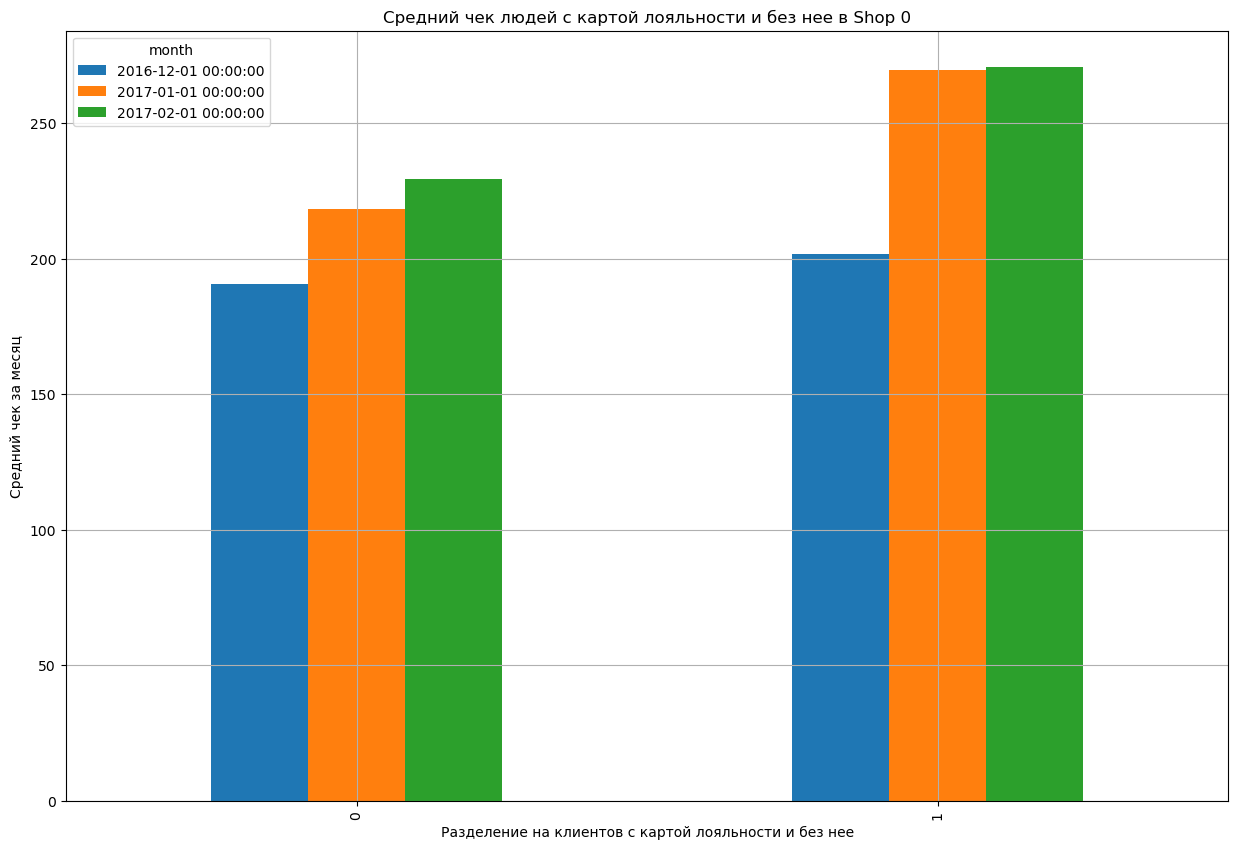

In [136]:
#построение столбчатой диаграммы
ax1=average_chek.plot(x='loyalty_program',kind='bar',grid=True, figsize=(15,10))
plt.xlabel('Разделение на клиентов с картой лояльности и без нее')
plt.ylabel('Средний чек за месяц')
plt.title('Средний чек людей с картой лояльности и без нее в Shop 0')
plt.show()

По Shop 0 мы видим, что с введением программы лояльности средний чек у пользователей без карты продолжает медленно увеличиваться. При этом средний чек у пользователей с картой лояльности с декабря по январь вырос на 25% и продолжает держаться на этом уровне в феврале.
Из этого следует, что программа лояльности увеличила средний чек у пользователей с картой.

### 3.4 Анализ среднего количества товаров в чеке по магазинам
<a id="quant"></a> 

In [137]:
#создание сводной таблицы с подсчетом количества товара в чеке
cnt_quantity_purchase=retail_shop_01.pivot_table(index=['loyalty_program','purchase_id','month'],
                                                 values='quantity', aggfunc='sum').reset_index()
cnt_quantity_purchase

,loyalty_program,purchase_id,month,quantity
0,0,536367,2016-12-01,71
1,0,536368,2016-12-01,11
2,0,536369,2016-12-01,2
3,0,536371,2016-12-01,79
4,0,536374,2016-12-01,31
...,...,...,...,...
4384,1,C544829,2017-02-01,4
4385,1,C544840,2017-02-01,4
4386,1,C544897,2017-02-01,2
4387,1,C545003,2017-02-01,15


In [138]:
#содание сводной таблицы с подсчетом среднего количества товара в чеке у пользователей с картой лояльностии без нее
cnt_quantity_purchase_01=(cnt_quantity_purchase.pivot_table(index='loyalty_program', columns='month', 
                                                            values='quantity',aggfunc='mean')
                          .round(2)
                          .reset_index())
cnt_quantity_purchase_01

month,loyalty_program,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00
0,0,153.66,167.22,145.01
1,1,141.83,169.32,198.78


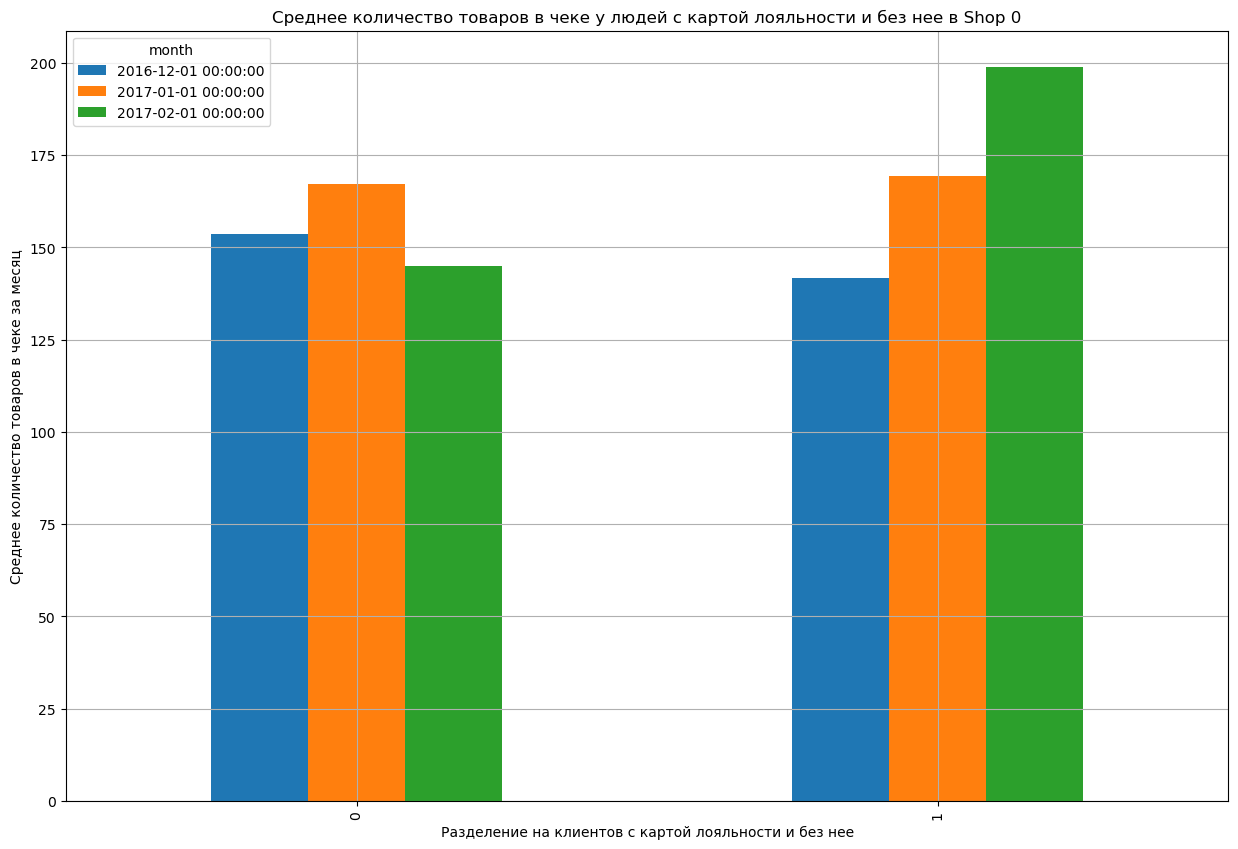

In [139]:
#построение двух столбчатых диаграмм
cnt_quantity_purchase_01.plot(x='loyalty_program',kind='bar',grid=True, figsize=(15,10))
plt.xlabel('Разделение на клиентов с картой лояльности и без нее')
plt.ylabel('Среднее количество товаров в чеке за месяц')
plt.title('Среднее количество товаров в чеке у людей с картой лояльности и без нее в Shop 0')

plt.show()

В Shop 0 идет спад среднего количества товаров в чеке с января по февраль у пользователей без карты лояльности, но у пользователей с картой лояльности наоборот, идет рост количества товаров в чеке ( с января среднее количество товара больше чем у пользователей без карты). 

### 3.5 Расчет доли пользователей с картой лояльности
<a id="share"></a> 

Теперь мы посчитаем долю уникальных пользователей с картой лояльности по отношению ко всем уникальным клиентам. Данный показатель поможет увидеть сколько людей каждый месяц пользовались нашей программой лояльности. Спрос на данную программу вырос или наоборот.

In [140]:
#расчет количества уникальных пользователей с картой лояльности и без нее по месяцам
share= (retail_shop_01.pivot_table(index='month',columns='loyalty_program', values='customer_id',aggfunc='nunique')
       .reset_index())
share

loyalty_program,month,0,1
0,2016-12-01,528,342
1,2017-01-01,446,237
2,2017-02-01,444,269


In [141]:
#расчет общего количества посетителей в каждом месяце
share['all']= share[0]+share[1]
share

loyalty_program,month,0,1,all
0,2016-12-01,528,342,870
1,2017-01-01,446,237,683
2,2017-02-01,444,269,713


In [142]:
#расчет доли клиентов с картой лояльности в %
share['share']= (share[1]*100/share['all']).round(2)
share

loyalty_program,month,0,1,all,share
0,2016-12-01,528,342,870,39.31
1,2017-01-01,446,237,683,34.70
2,2017-02-01,444,269,713,37.73


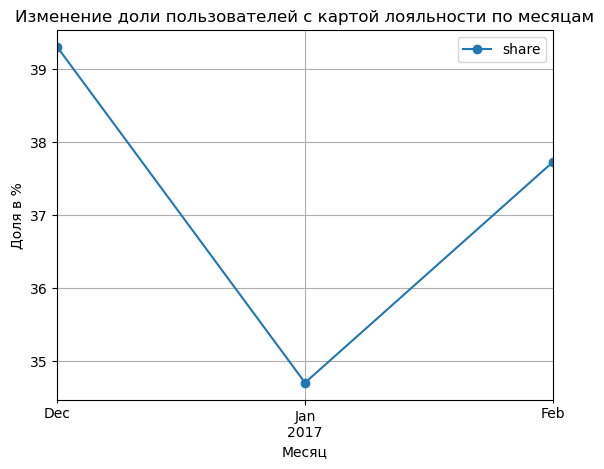

In [143]:
#построение графика изменения доли
share.plot(x='month', y='share',grid=True, style='-o')
plt.xlabel('Месяц')
plt.ylabel('Доля в %')
plt.title('Изменение доли пользователей с картой лояльности по месяцам')
plt.show()

По графику мы видим, что доля пользователей с картой лояльности в январе уменьшилась, но потом опять начала расти.  В среднем за три месяца доля пользователей с картой лояльности равна 37%. Этот процент показывает, что 1/3 клиентов магазина заинтересовалась данной программой и использует ее.

### 3.6 Расчет пользовательской активности за месяц
<a id="mau"></a> 

В данном блоке будет проведен анализ среднего количества уникальных пользователей в месяц с картой лояльности и без нее.

Для начала мы составим таблицу с подсчетом уникальных пользователей по каждому месяцу с разбивкой на лояльных и не лояльных пользователей.

In [144]:
#создание таблицы с расчетом уникальных пользоватлей в каждом месяце 
cnt_total = (
    retail_shop_01.groupby(['month','loyalty_program'])
    .agg({'customer_id': 'nunique'}).reset_index()
)
cnt_total

,month,loyalty_program,customer_id
0,2016-12-01,0,528
1,2016-12-01,1,342
2,2017-01-01,0,446
3,2017-01-01,1,237
4,2017-02-01,0,444
5,2017-02-01,1,269


In [145]:
#создание сводной таблицы с расчетом среднего количества уникальных пользователей в месяц
average_cnt=cnt_total.pivot_table(index='loyalty_program',values='customer_id',aggfunc='mean')
average_cnt['customer_id']= average_cnt['customer_id'].astype('int')
average_cnt

,customer_id
loyalty_program,
0,472
1,282


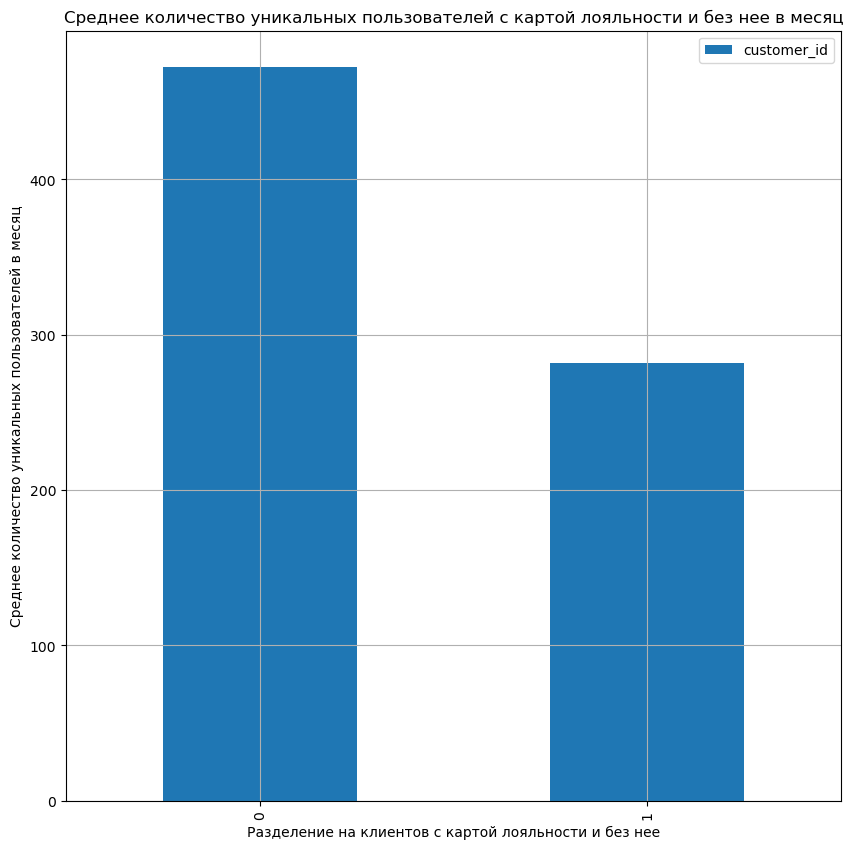

In [146]:
#построение графика 
average_cnt.plot( kind='bar',grid=True, figsize=(10,10))
plt.xlabel('Разделение на клиентов с картой лояльности и без нее')
plt.ylabel('Среднее количество уникальных пользователей в месяц')
plt.title('Среднее количество уникальных пользователей с картой лояльности и без нее в месяц')
plt.show()

In [147]:
#расчет разницы между средним количеством уникальных пользователей
print('Разница между средним количеством уникальных',average_cnt.loc[0]-average_cnt.loc[1])

Разница между средним количеством уникальных customer_id    190
dtype: int32


Данный анализ показал, что количество уникальный пользователей без карты лояльности в месяц больше на 190 пользователя(40,25%), чем пользователей, которые используют программу лояльности. 
Это говорит нам о том, что 40,25% наших клиентов не знают о нашей программе лояльности или не хотят ею пользоваться. 

### 3.7 Анализ LTV по зарегистрированным пользователям
<a id="ltv"></a> 

Чтоб провести данный анализ, нужно убрать пропущенные значение в столбце customer_id. Так как по не зарегистрированным пользователям нельзя точно расчитать их жизненный цикл.

In [148]:
#создаем новую таблицу без пропусков в customer_id
customer_retail=retail_shop_01.dropna(subset=['customer_id']).reset_index(drop=True)
customer_retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,month,price_per_one,sum_price
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,2016-12-01,1.63,17.93
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,2016-12-01,3.29,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,2016-12-01,1.63,11.41
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,2017-02-01,4.37,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,2017-02-01,5.75,0.00


In [149]:
#пишем функцию для создания профилей прользователей
def get_profiles(customer_retail):
    """Функция для создания профилей пользователей
 
     на вход принимает за агрумент таблицу с зарегистрированными пользователями"""
    # сортируем продажи по ID пользователя и дате первого посещения 
    # группируем по ID и находим первые значения purchase_date, loyalty_program 
    # столбец с временем первого посещения назовём first_ts
    profiles = (
        customer_retail.sort_values(by=['customer_id', 'purchase_date'])
        .groupby('customer_id')
        .agg({'purchase_date': 'first','loyalty_program':'first'})
        .rename(columns={'purchase_date': 'first_ts'})
        .reset_index()
    )

    # определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles 

In [150]:
#применим функцию
profiles= get_profiles(customer_retail)
profiles

,customer_id,first_ts,loyalty_program,dt,month
0,18426.0,2016-12-05 15:38:00,0,2016-12-05,2016-12-05 15:38:00
1,18427.0,2016-12-01 12:48:00,0,2016-12-01,2016-12-01 12:48:00
2,18499.0,2017-01-17 12:34:00,0,2017-01-17,2017-01-17 12:34:00
3,18502.0,2017-02-16 12:15:00,0,2017-02-16,2017-02-16 12:15:00
4,18505.0,2016-12-09 15:21:00,0,2016-12-09,2016-12-09 15:21:00
...,...,...,...,...,...
1564,23938.0,2016-12-08 13:38:00,1,2016-12-08,2016-12-08 13:38:00
1565,23939.0,2016-12-16 18:23:00,1,2016-12-16,2016-12-16 18:23:00
1566,23948.0,2016-12-08 13:53:00,1,2016-12-08,2016-12-08 13:53:00
1567,23956.0,2017-01-25 12:34:00,1,2017-01-25,2017-01-25 12:34:00


In [151]:
#создание функции для расчета ltv
def get_ltv(
    profiles,
    customer_retail,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    """Функция для расчета LTV
    
    на входе принимает аргументы: профили пользователей, таблица с зарегистрированными пользователями, момент события,
    горизонт события, передаваемый список столбцов и опция для игнорирования горизонта"""
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и стоимость товаров в чеке
        customer_retail[['customer_id', 'purchase_date', 'sum_price']],
        on='customer_id',
        how='left',
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['purchase_date'] - result_raw['first_ts']
    ).dt.days
    #расчитываем сколько людей с программой лояльности совершали на 32 дней
    lifetime_32=result_raw.query('lifetime == 32 and loyalty_program == 1')
    cnt_32=lifetime_32['customer_id'].nunique()

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_id': 'nunique'})
            .rename(columns={'customer_id': 'cohort_size'})
        )
        #строим таблицу выручки
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='sum_price',
            aggfunc='sum')
        
        #добавляем сумму за покупку карты лояльности в день 0 лайфтайма
        result.loc[1,0]=result.loc[1,0]+ (cohort_sizes.loc[1,'cohort_size']*200)
        #добавляем сумма за продление карты лояльности на 32 день, так как в месяце может быть 30 или 31 день
        result.loc[1,31]=result.loc[1,31]+ (cnt_32*200)
        
        # считаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV- делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

In [152]:
#момент события
observation_date= datetime(2017,2,28).date()

#горизонт событий
horizon_days= 45 

In [153]:
#используем функцию для расчета ltv
ltv_raw, ltv, ltv_history= get_ltv(profiles, customer_retail, observation_date, horizon_days,dimensions=['loyalty_program'])

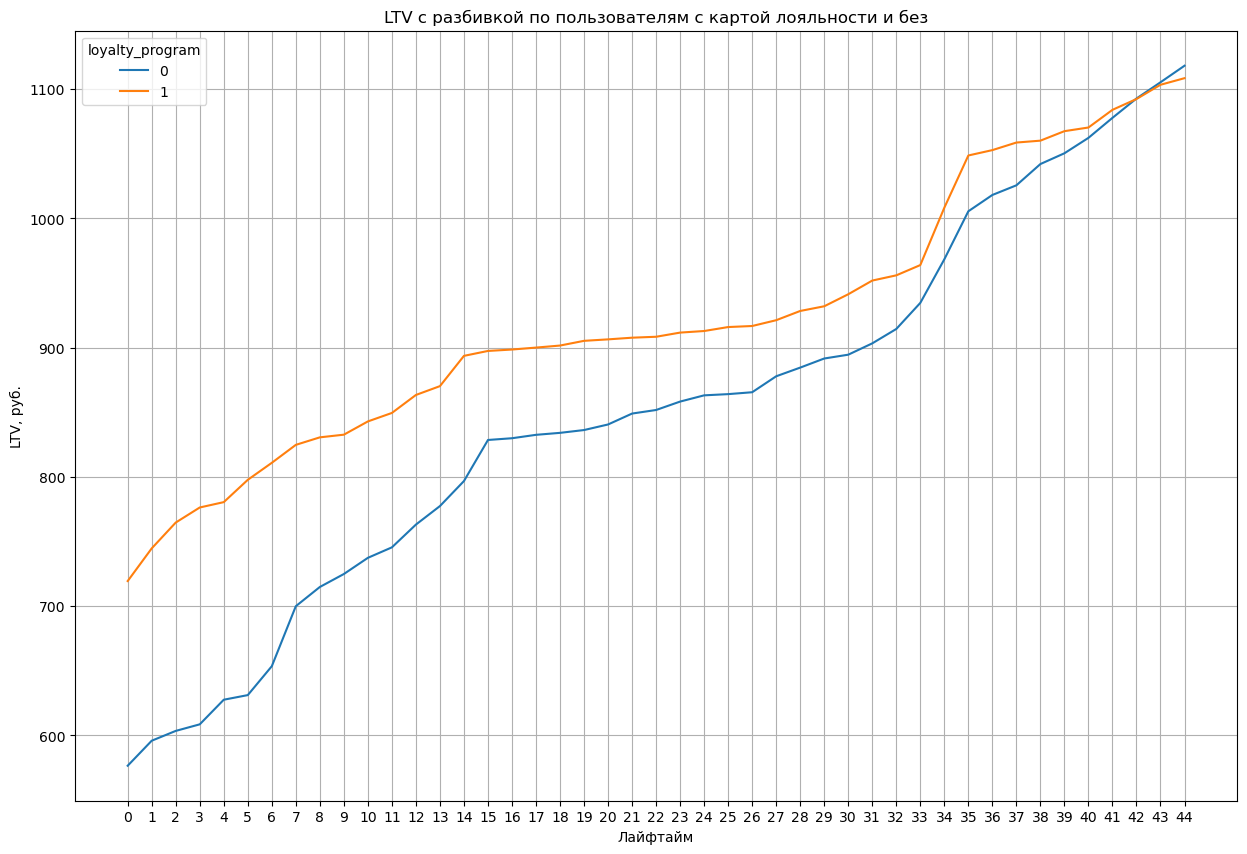

In [154]:
# строим кривые LTV с разбивкой на лояльных и не лояльных пользователей
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(15, 10), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по пользователям с картой лояльности и без')
plt.ylabel('LTV, руб.')
plt.xlabel('Лайфтайм')
plt.show()

По данному графику мы видим, что за 45 дней происходит рост пожизненной ценности клиентов с картой лояльности и без нее.
При этом в первые 42 дня пожизненная ценность клиентов с картой лояльности выше, чем у клиентов без карты, но с 43 дня ситуация меняется и ценность клиентов без карты становится выше, чем у клиентов с картой.

Возможно это связано с тем, что клиенты с картой лояльности использовали карту 42 дня, продлили ее на 32 день, но так и не нашли для себя значительные плюсы с данной программы лояльности.

В этом разделе мы выяснили, что у нас есть данные с 1 декабря 2016 года по 28 февраля 2017 года. Программа лояльности тестировалась не на всех магазинах, только на Shop 0, 19 и 8. Но мы взяли для дальнейшего анализа только магазин 0, потому что у него большое количество чеком по отношению к другим магазинам и 1000 чеков не целесообразно сравнивать с 10-ю.

При анализе среднего чека было выявлено, что только в магазине 0 происходит рост среднего чека у клиентов с программой лояльности, а у остальных клиентов средний чек падает. 

График со средним количеством товаров в чеке показал похожу картину как и со средним чеком. Клиенты в магазине 0 стали больше покупать товаров с картой лояльности, а другие клиенты наоборот меньше. 

Доля покупателей с картой лояльности с декабря по февраль составила 37%. 

Было выявлено, что количество уникальный пользователей без карты лояльности в месяц больше на 190 пользователя(40,25%), чем пользователей, которые используют программу лояльности. 


## 4 Проверка гипотез
<a id="gip"></a> 

### 4.1 Гипотеза 1: средний чек участников программы лояльности выше, чем у остальных покупателей.
<a id="gip1"></a> 

H0 - средний чек у участников программы лояльности равен среднему чеку пользователей без карты лояльности.
Н1 - средний чек у участников программы лояльности выше, чем у пользователей без карты лояльности 

In [155]:
#создание сводной таблицы с подсчетом суммы чека пользователей без карты лояльности 
purchase_0=(retail_shop_01.query('loyalty_program ==0')
          .pivot_table(index='purchase_id',values='sum_price', aggfunc='sum').reset_index())
purchase_0

,purchase_id,sum_price
0,536367,285.395
1,536368,96.090
2,536369,13.200
3,536371,462.150
4,536374,367.350
...,...,...
3048,C544830,26.290
3049,C544831,19.760
3050,C544901,77.125
3051,C545040,11.820


In [156]:
#создание сводной таблицы с подсчетом суммы чека пользователей с картой лояльности
purchase_1=(retail_shop_01.query('loyalty_program ==1')
          .pivot_table(index='purchase_id',values='sum_price', aggfunc='sum'))
purchase_1

,sum_price
purchase_id,
536365,186.515
536366,19.750
536372,19.750
536373,367.365
536375,367.365
...,...
C544829,7.930
C544840,38.870
C544897,16.940


Проверим данные на выбросы, чтоб выбрать правильный метод для проверки гипотезы.

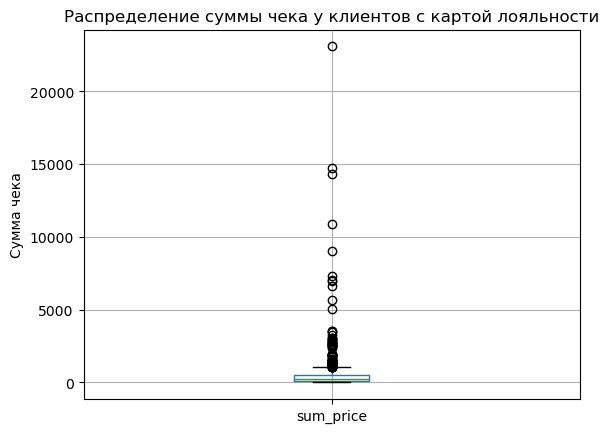

In [157]:
#анализ аномальных значений по сумме чеков у пользователей программмы лояльности
purchase_1.boxplot(column='sum_price')
plt.ylabel('Сумма чека')
plt.title('Распределение суммы чека у клиентов с картой лояльности')
plt.show()

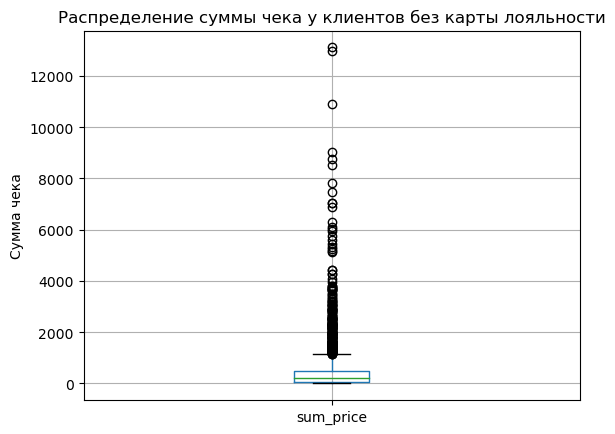

In [158]:
#анализ аномальных значений по сумме чеков у клиентов без карты
purchase_0.boxplot(column='sum_price')
plt.ylabel('Сумма чека')
plt.title('Распределение суммы чека у клиентов без карты лояльности')
plt.show()

В данных есть большие выбросы, поэтому для проверки гипотезы мы используем непараметрический тест Манна-Уитни.

In [159]:
#проверка гипотезы
results = st.mannwhitneyu(purchase_1['sum_price'], purchase_0['sum_price'])

# критический уровень статистической значимости
alpha=0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.0115681754712085
Отвергаем нулевую гипотезу: разница статистически значима


Получается, что средний чек клиентов с картой лояльности имеет статистически значимые различия со средним чеком клиентов без карты.

### 4.2 Гипотеза 2: среднее количество товаров в чеке у участников программы лояльности выше
<a id="gip2"></a> 

H0 - среднее количество товаров в чеке у участников программы лояльности равно среднему количеству товаров в чеке у пользователей без карты лояльности.
Н1 - среднее количество товаров в чеке у участников программы лояльности больше, чем у пользователей без карты лояльности 

In [160]:
#создание сводной таблицы с подсчетом количества товаров в чеке у пользователей без карты лояльности 
quantity_0=(retail_shop_01.query('loyalty_program ==0')
          .pivot_table(index='purchase_id',values='quantity', aggfunc='sum').reset_index())
quantity_0

,purchase_id,quantity
0,536367,71
1,536368,11
2,536369,2
3,536371,79
4,536374,31
...,...,...
3048,C544830,11
3049,C544831,18
3050,C544901,22
3051,C545040,2


In [161]:
#создание сводной таблицы с подсчетом количества товаров в чеке у пользователей с картой лояльности 
quantity_1=(retail_shop_01.query('loyalty_program ==1')
          .pivot_table(index='purchase_id',values='quantity', aggfunc='sum').reset_index())
quantity_1

,purchase_id,quantity
0,536365,33
1,536366,10
2,536372,10
3,536373,72
4,536375,72
...,...,...
1331,C544829,4
1332,C544840,4
1333,C544897,2
1334,C545003,15


Проверка данных на выбросы 

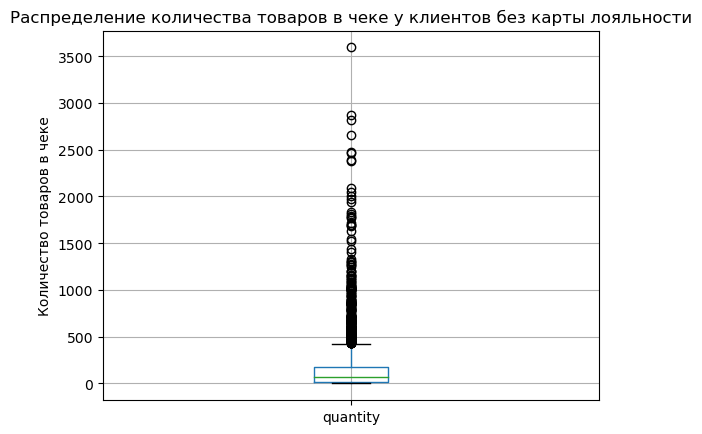

In [162]:
#анализ аномальных значений по количеству товаров в чеке клиентов без карты
quantity_0.boxplot(column='quantity')
plt.ylabel('Количество товаров в чеке')
plt.title('Распределение количества товаров в чеке у клиентов без карты лояльности')
plt.show()

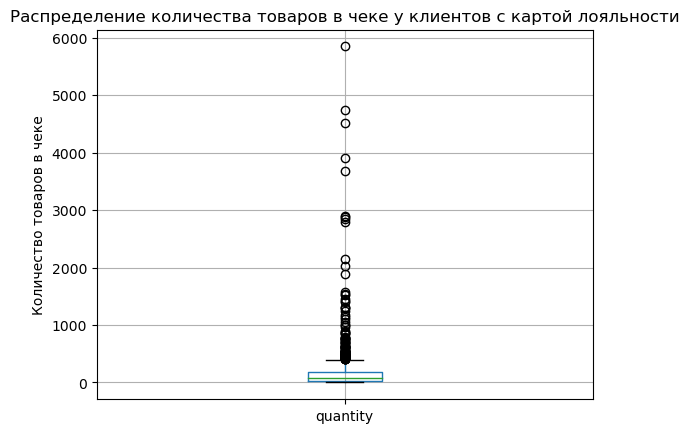

In [163]:
#анализ аномальных значений по количеству товаров в чеке у клиентов с картой лояльности
quantity_1.boxplot(column='quantity')
plt.ylabel('Количество товаров в чеке')
plt.title('Распределение количества товаров в чеке у клиентов с картой лояльности')
plt.show()

В данных обнаружены большие выбросы, поэтому для проверки гипотезы мы используем непараметрический тест Манна-Уитни.

In [164]:
results = st.mannwhitneyu(quantity_1['quantity'], quantity_0['quantity'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.003261381266672575
Отвергаем нулевую гипотезу: разница статистически значима


При проверке гипотез мы выяснили, что есть статистически значимое различие в среднем чеке и в среднем количестве товаров в чеке у пользователей, участвовавших в программе лояльности и не участвовавших .

## 5 Вывод
<a id="all"></a> 

В данной работе мы изучили и подготовили данные для дальнейшего анализа, проанализировали программу лояльности и проверили гипотезы.

В первой и второй части мы ознакомились с таблицей, изменили названия столбцов на змеиный регистр, изменили типы данных, где это было нужно, удалили явные дубликаты и аномальные значений, объединили таблицы и создали новые столбцы.

В третьей части мы выяснили, что у нас есть данные с 1 декабря 2016 года по 28 февраля 2017 года с 31 магазина, но программа лояльности тестировалась только в магазине 0, 8, 19. Для дальнейшего анализа мы отобрали только магазин 0, так как в нем есть большое количество чеков.

Был проведен анализ среднего чека по пользователям с картой лояльности и без нее. Были сделаны следующие выводы:
- В магазине 0 за три месяца уменьшился средний чек среди клиентов, не участвовавших в программе лояльности. 
- Был замечен рост среднего чека у клиентов с картой лояльности.

График со средним количеством товаров в чеке показал похожу картину как и со средним чеком. При анализе среднего количества товаров в чеке были сделаны следующие выводы:
- В магазине 0 за три месяца выросло среднее количество товаров в чеке среди пользователей программы лояльности.  
- Среднее количество товаров в чеке среди других клиентов начало снижаться. 

Далее была изучена доля клиентов с картой лояльности. В среднем она составила с декабря по февраль 37%. Этот процент показывает сколько клиентов заинтересовались данной программой и использует ее. 

При расчете пользовательской активности за месяц пользователями с картой лояльности и без нее было выявлено, что количество уникальный пользователей без карты лояльности в месяц больше на 190 пользователя(40,25%), чем пользователей, которые используют программу лояльности. Получается 40,25% наших клиентов не знают о нашей программе лояльности или не хотят ею пользоваться.

Анализ LTV показал, что за 45 дней происходит рост пожизненной ценности клиентов с картой лояльности и без нее. При этом в первые 42 дня пожизненная ценность клиентов с картой лояльности выше, чем у клиентов без карты, но с 43 дня ситуация меняется и ценность клиентов без карты становится выше, чем у клиентов с картой. Возможно это связано с тем, что клиенты с картой лояльности использовали карту 42 дня, продлили ее на 32 день, но так и не нашли для себя значительные плюсы с данной программы лояльности.

В четвертой части были проверены две гипотезы. Гипотеза 1: средний чек участников программы лояльности выше, чем у остальных покупателей. Гипотеза 2: среднее количество товаров в чеке у участников программы лояльности выше. Мы выяснили, что есть статистически значимые различия в среднем чеке и в среднем количестве товаров в чеке у пользователей, участвовавших в программе лояльности и не участвовавших.

В итоге программа лояльности статистически значимо повлияла на средний чек и среднее количество товаров в чеке. 

Рекомендации:
- Ознакамливать каждого клиента с данной программой.
- Провести анализ целевой аудитории для программы лояльности. То есть это программа создана для обычных людей или для мастеров-строителей.
- Разделить программу лояльности на мастеров-строителей и обычных клиентов. Для мастеров - строителей сделать накопительную систему, чтоб они больше и чаще покупали товары именно в нашем магазине. Для обычных клиентов-сделать фиксированную скидку, так как они делают покупки реже чем мастера-строители.
- Сделать бесплатный пробный период для использования картой, чтоб клиенты могли понять свою выгоду в данной программе или же сделать использование картой бесплатным. 
- Запустить программу лояльности во всех магазинах и сделать повторный анализ . 

## 6 Презентация
<a id="present"></a> 

https://docs.google.com/presentation/d/1gFT9n7nR6ZWRiMjqLM4TcRUvC-gkyPHPYLvT5GcNUsk/edit?usp=sharing

## 7 Дашборд
<a id="dashbord"></a> 

https://public.tableau.com/app/profile/irina.trofimenko/viz/__16859855559500/Dashboard1?publish=yes